In [114]:
import omdb
import pandas as pd
import urllib.request, urllib.parse, urllib.error
import json
import csv
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import datasets, linear_model
from scipy import special, optimize
import numpy as np
from scipy.optimize import curve_fit

lrom=['0120338','0099653','0100405','1000774']
lact=['1300854','1074638','0468569','2488496']
lhor=['0070047','0298130','0816711','0289765']
lfam=['2294629','2293640','2277860','3469046','0110357']
ldra=['0120338','2322441','0109830','0398808','0119643']

roms=pd.read_hdf('RomDB.h5', 'key')
acts=pd.read_hdf('ActDB.h5', 'key')
dras=pd.read_hdf('DraDB.h5', 'key')
hors=pd.read_hdf('HorDB.h5', 'key')
fams=pd.read_hdf('FamDB.h5', 'key')


movdb=pd.read_hdf('movbaseA.h5', 'imdb_id')
movdb=movdb.reset_index()


In [115]:
test={'1300854':acts['1300854'],'1074638':acts['1074638'],'0468569':acts['0468569'],'2488496':acts['2488496']}
acts=pd.Panel(test)

In [124]:
acts.dropna(axis=1, inplace=True)
dras.dropna(axis=1, inplace=True)
fams.dropna(axis=1, inplace=True)
roms.dropna(axis=1, inplace=True)
hors.dropna(axis=1, inplace=True)

Densities of Romance:  3.041310372129849
Densities of Romance:  2.4197743467933495
Densities of Romance:  2.897234475738039
Densities of Romance:  2.8170031670625497


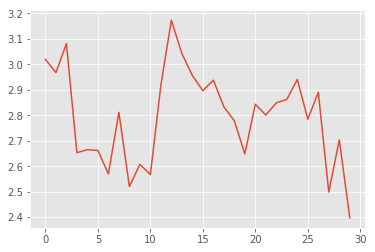

In [135]:
for ii in range(0,len(lrom)):
    roms[lrom[ii]].loc[:,'StartTimestamp'] = pd.to_datetime(roms[lrom[ii]].loc[:,('StartTime')], format="%H:%M:%S")
    roms[lrom[ii]].loc[:,'EndTimestamp'] = pd.to_datetime(roms[lrom[ii]].loc[:,('EndTime')], format="%H:%M:%S")
    roms[lrom[ii]]['Density'] = roms[lrom[ii]].apply(lambda row: len(row['Line'].split())/
        (row['EndTimestamp']-row['StartTimestamp']).total_seconds() if row['EndTimestamp'] != row['StartTimestamp'] else 0.0, axis=1)
for ii in range(0,len(lrom)):
    print('Densities of Romance: ',roms[lrom[ii]]['Density'].mean())

alls=[]
bins=30
for jj in range(0,len(lrom)):
    freqs=roms[lrom[jj]]['Density'].values.astype('float32')
    smooth=np.zeros(bins)
    for ii in range(0,bins):
        box=len(freqs)//bins
        smooth[ii]=freqs[(ii)*box:(ii+1)*box].mean()
    alls.append(smooth)   
froms=(alls[0]+alls[1]+alls[2]+alls[3])/len(lrom)
plt.plot(froms)
plt.show()

Densities of Action:  3.329896479759865
Densities of Action:  2.8948998178506353
Densities of Action:  2.891089860352154
Densities of Action:  3.078597449908927


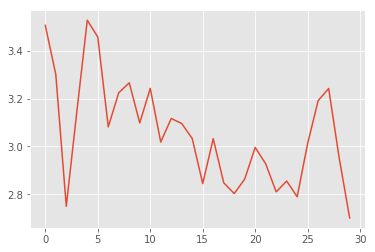

In [133]:
for ii in range(0,len(lact)):
    acts[lact[ii]].loc[:,'StartTimestamp'] = pd.to_datetime(acts[lact[ii]].loc[:,('StartTime')], format="%H:%M:%S")
    acts[lact[ii]].loc[:,'EndTimestamp'] = pd.to_datetime(acts[lact[ii]].loc[:,('EndTime')], format="%H:%M:%S")
    acts[lact[ii]]['Density'] = acts[lact[ii]].apply(lambda row: len(row['Line'].split())/
        (row['EndTimestamp']-row['StartTimestamp']).total_seconds() if row['EndTimestamp'] != row['StartTimestamp'] else 0.0, axis=1)
for ii in range(0,len(lrom)):
    print('Densities of Action: ',acts[lact[ii]]['Density'].mean())
    
allact=[]
bins=30
for jj in range(0,len(lact)):
    freqs=acts[lact[jj]]['Density'].values.astype('float32')
    smooth=np.zeros(bins)
    for ii in range(0,bins):
        box=len(freqs)//bins
        smooth[ii]=freqs[(ii)*box:(ii+1)*box].mean()
    allact.append(smooth)   
fact=(allact[0]+allact[1]+allact[2]+allact[3])/len(lact)
plt.plot(fact)
plt.show()

Densities of Drama:  3.0697916666666663
Densities of Drama:  2.969435036945812
Densities of Drama:  2.5096187397372742
Densities of Drama:  2.67514367816092


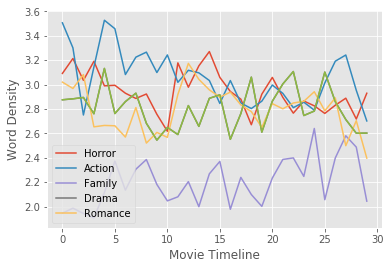

In [199]:
for ii in range(0,len(ldra)):
    dras[ldra[ii]].loc[:,'StartTimestamp'] = pd.to_datetime(dras[ldra[ii]].loc[:,('StartTime')], format="%H:%M:%S")
    dras[ldra[ii]].loc[:,'EndTimestamp'] = pd.to_datetime(dras[ldra[ii]].loc[:,('EndTime')], format="%H:%M:%S")
    dras[ldra[ii]]['Density'] = dras[ldra[ii]].apply(lambda row: len(row['Line'].split())/
        (row['EndTimestamp']-row['StartTimestamp']).total_seconds() if row['EndTimestamp'] != row['StartTimestamp'] else 0.0, axis=1)
for ii in range(0,len(lrom)):
    print('Densities of Drama: ',dras[ldra[ii]]['Density'].mean())
    
allact=[]
bins=30
for jj in range(0,len(ldra)):
    freqs=dras[ldra[jj]]['Density'].values.astype('float32')
    smooth=np.zeros(bins)
    for ii in range(0,bins):
        box=len(freqs)//bins
        smooth[ii]=freqs[(ii)*box:(ii+1)*box].mean()
    allact.append(smooth)   
fdra=(allact[0]+allact[1]+allact[2]+allact[3])/len(lact)
plt.plot(fdra)
plt.show()

Densities of Family:  3.0697916666666663
Densities of Family:  2.969435036945812
Densities of Family:  2.5096187397372742
Densities of Family:  2.67514367816092


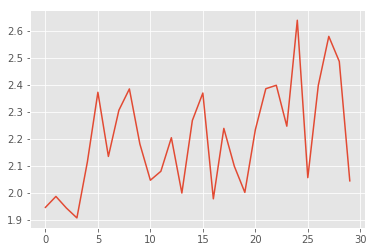

In [200]:
for ii in range(0,len(lfam)):
    fams[lfam[ii]].loc[:,'StartTimestamp'] = pd.to_datetime(fams[lfam[ii]].loc[:,('StartTime')], format="%H:%M:%S")
    fams[lfam[ii]].loc[:,'EndTimestamp'] = pd.to_datetime(fams[lfam[ii]].loc[:,('EndTime')], format="%H:%M:%S")
    fams[lfam[ii]]['Density'] = fams[lfam[ii]].apply(lambda row: len(row['Line'].split())/
        (row['EndTimestamp']-row['StartTimestamp']).total_seconds() if row['EndTimestamp'] != row['StartTimestamp'] else 0.0, axis=1)
for ii in range(0,len(lrom)):
    print('Densities of Family: ',dras[ldra[ii]]['Density'].mean())
    
allact=[]
bins=30
for jj in range(0,len(lfam)):
    freqs=fams[lfam[jj]]['Density'].values.astype('float32')
    smooth=np.zeros(bins)
    for ii in range(0,bins):
        box=len(freqs)//bins
        smooth[ii]=freqs[(ii)*box:(ii+1)*box].mean()
    allact.append(smooth)   
ffam=(allact[0]+allact[1]+allact[2]+allact[3])/len(lfam)
plt.plot(ffam)
plt.show()

Densities of Action:  3.1059874888293115
Densities of Action:  2.502815013404828
Densities of Action:  3.1126899016979457
Densities of Action:  3.018975275543639


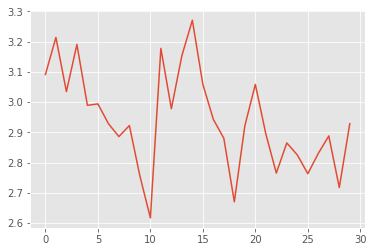

In [139]:
for ii in range(0,len(lhor)):
    hors[lhor[ii]].loc[:,'StartTimestamp'] = pd.to_datetime(hors[lhor[ii]].loc[:,('StartTime')], format="%H:%M:%S")
    hors[lhor[ii]].loc[:,'EndTimestamp'] = pd.to_datetime(hors[lhor[ii]].loc[:,('EndTime')], format="%H:%M:%S")
    hors[lhor[ii]]['Density'] = hors[lhor[ii]].apply(lambda row: len(row['Line'].split())/
        (row['EndTimestamp']-row['StartTimestamp']).total_seconds() if row['EndTimestamp'] != row['StartTimestamp'] else 0.0, axis=1)
for ii in range(0,len(lrom)):
    print('Densities of Action: ',hors[lhor[ii]]['Density'].mean())
    
allact=[]
bins=30
for jj in range(0,len(lhor)):
    freqs=hors[lhor[jj]]['Density'].values.astype('float32')
    smooth=np.zeros(bins)
    for ii in range(0,bins):
        box=len(freqs)//bins
        smooth[ii]=freqs[(ii)*box:(ii+1)*box].mean()
    allact.append(smooth)   
fhor=(allact[0]+allact[1]+allact[2]+allact[3])/len(lhor)


In [198]:
plt.plot(fhor, label='Horror')
plt.plot(fact, label='Action')
plt.plot(ffam, label='Family')
plt.plot(fdra, label='Drama')
plt.plot(froms, label='Romance')
plt.ylabel('Word Density')
plt.xlabel('Movie Timeline')
plt.legend()
plt.savefig('testplot.png',dpi=300)